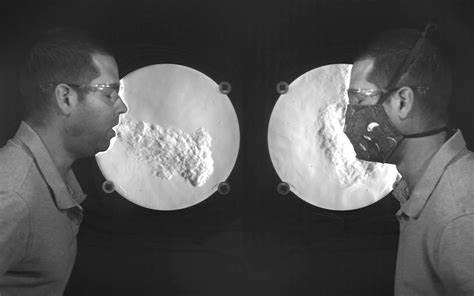

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.3.0'

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:/Users/venuk/OneDrive/Desktop/2 class/images',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 66 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/venuk/OneDrive/Desktop/2 class/images',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 66 images belonging to 2 classes.


In [6]:
#Initializing the CNN
cnn = tf.keras.models.Sequential()

In [7]:
#adding convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [8]:
#adding pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
#adding flatten layer
cnn.add(tf.keras.layers.Flatten())

In [11]:
#fully connected layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [12]:
#output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
3/3 [==============================] - 1s 498ms/step - loss: 0.6365 - accuracy: 0.6212 - val_loss: 3.3664 - val_accuracy: 0.5000
Epoch 2/25
3/3 [==============================] - 1s 425ms/step - loss: 4.4092 - accuracy: 0.5000 - val_loss: 2.0606 - val_accuracy: 0.5000
Epoch 3/25
3/3 [==============================] - 1s 431ms/step - loss: 0.8386 - accuracy: 0.5909 - val_loss: 0.7294 - val_accuracy: 0.5000
Epoch 4/25
3/3 [==============================] - 1s 324ms/step - loss: 0.7489 - accuracy: 0.5000 - val_loss: 0.7780 - val_accuracy: 0.5000
Epoch 5/25
3/3 [==============================] - 1s 357ms/step - loss: 0.7534 - accuracy: 0.5000 - val_loss: 0.7014 - val_accuracy: 0.5000
Epoch 6/25
3/3 [==============================] - 1s 307ms/step - loss: 0.7068 - accuracy: 0.5000 - val_loss: 0.6805 - val_accuracy: 0.5303
Epoch 7/25
3/3 [==============================] - 1s 316ms/step - loss: 0.6805 - accuracy: 0.5606 - val_loss: 0.6765 - val_accuracy: 0.7576
Epoch 8/25
3/3 [====

In [26]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:/Users/venuk/OneDrive/Desktop/2 class/testimages/withoutmask.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
 

{'with_mask': 0, 'without_mask': 1}

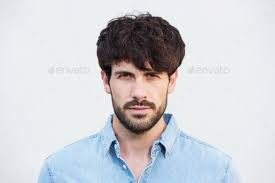

In [22]:
print(result)

[[1.]]


In [23]:
if result[0][0] == 1:
    prediction = 'without_mask'
else:
    prediction = 'with_mask'

In [24]:
print(result)

[[1.]]


In [25]:
print(prediction)

without_mask
